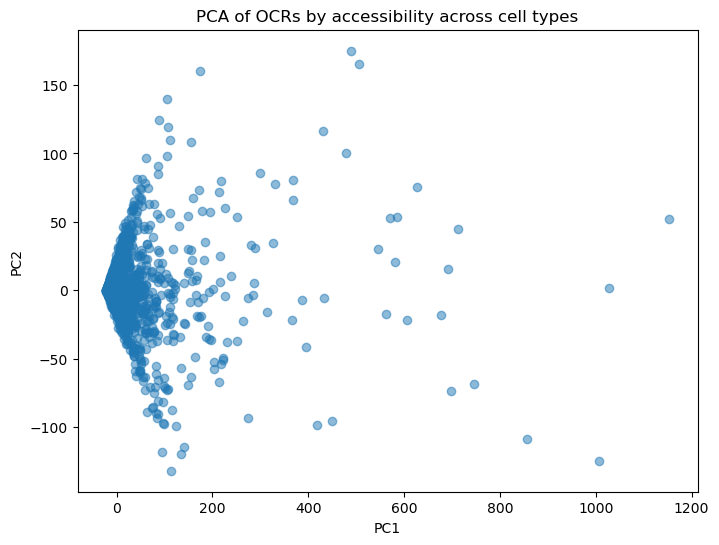

AttributeError: QuadMesh.set() got an unexpected keyword argument 'figsize'

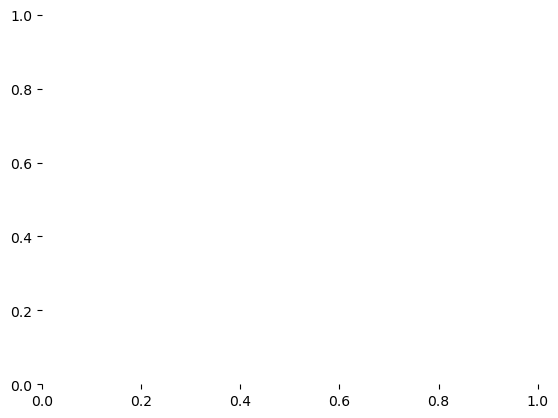

In [9]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df_raw = pd.read_csv("data/ImmGenATAC18_AllOCRsInfo.csv", header=0, quotechar='"', low_memory=False)

# Extract only the cell type columns (from column 54 onward)
df_expr = df_raw.iloc[:5000, 53:]
df_expr.index = df_raw.iloc[:5000, 0]  # OCR ID or similar

# PCA with 25 components
pca = PCA(n_components=25)
X_pca = pca.fit_transform(df_expr)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of OCRs by accessibility across cell types')
plt.show()
from sklearn.cluster import KMeans


k = 20  # Tune this if needed
kmeans = KMeans(n_clusters=k, random_state=42)
df_expr['Cluster'] = kmeans.fit_predict(df_expr)

cluster_means = df_expr.groupby('Cluster').mean()

# Optionally: plot a heatmap of the cluster means
sns.heatmap(cluster_means, cmap='vlag', figsize=(12, 8))
plt.title("Cluster Mean Accessibility per Cell Type")
plt.show()
sns.clustermap(df_expr, row_linkage=cluster_means, col_linkage=cluster_means,
               cmap="vlag", figsize=(10, 10), xticklabels=df_expr.index, yticklabels=df_expr.index)
plt.suptitle("Hierarchical Clustering of OCRs based on their Accessibility in NK, ILC(after PCA + Pearson)", y=1.02)
plt.show()